<a href="https://colab.research.google.com/github/Riverag0011/ADS-504-02-Machine-Learning-Deep-Learning-For-Data-Science/blob/main/Assignment_4_1_Exercises_Code_GR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4.1 Excercises

Name: Gabi Rivera\
Date: 21Jul2024\
Course: ADS504-02

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import tarfile
from sklearn.datasets import make_classification
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,StandardScaler, Normalizer
#from sklearn.metrics import confusion_matrix, accuracy_score,plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import SGDClassifier
from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bootstrap_point632_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=matplotlib.cbook.mplDeprecation)

**2 Linear Classification**

Install the package mlextend: http://rasbt.github.io/mlxtend/installation/   \
Next, you will do a few exercises to visualize the difference between the different linear classifiers.\
Generate classification data using make_classification from sklearn.datasets:
`X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)`

Use SGDClassifier to train classifiers using different loss functions: log, hinge, and perceptron. Visualize
the trained classifiers using `plot_decision_regions(X, y, clf=model, legend=2)` from
the mlextend package. Plot the decision region for each of the three loss functions: a sample plot
for hinge loss appears below.

In [ ]:
# Classification Data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

**SGD Classifier - Log Loss**

Text(0.5, 1.0, 'SGD Classifier using Log Loss')

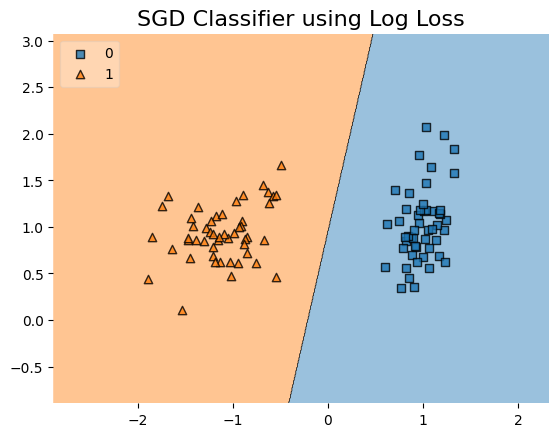

In [ ]:
# Train SGDClassifier model with Logistic Regression
sgdclf_log = SGDClassifier(loss='log').fit(X, y)

plt.subplot(1, 1, 1)
plot_decision_regions(X, y, clf=sgdclf_log, legend=2)
plt.title('SGD Classifier using Log Loss', size=16)

**SGD Classifier - Hinge Loss**

Text(0.5, 1.0, 'SGD Classifier using Hinge Loss')

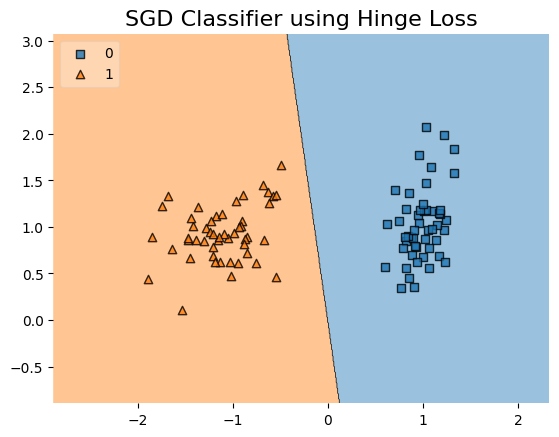

In [ ]:
# Train SGDClassifier model with SVM
sgdclf_hinge = SGDClassifier(loss='hinge').fit(X, y)

plt.subplot(1, 1, 1)
plot_decision_regions(X, y, clf=sgdclf_hinge, legend=2)
plt.title('SGD Classifier using Hinge Loss', size=16)

**SGD Classifier - Perceptron**

Text(0.5, 1.0, 'SGD Classifier using Perceptron Loss')

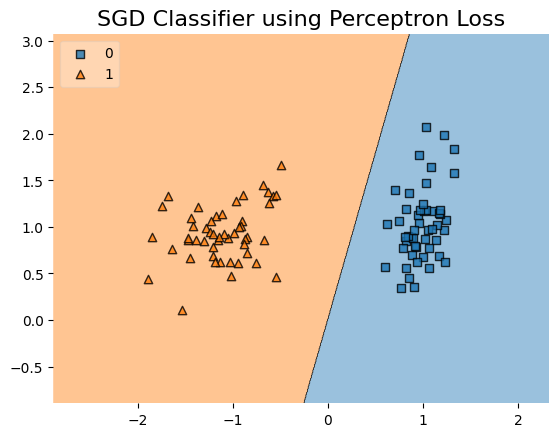

In [ ]:
# Train SGDClassifier model with Perceptron Loss
sgdclf_perc = SGDClassifier(loss='perceptron').fit(X, y)

plt.subplot(1, 1, 1)
plot_decision_regions(X, y, clf=sgdclf_perc, legend=2)
plt.title('SGD Classifier using Perceptron Loss', size=16)

Now, create a larger classification dataset. You will use cross_val_score from scikit-learn and
compare this to bootstrap_scores from mlextend.
Set up the simulated data as follows:

`X, y = make_classification(n_samples=10000,n_features=20, n_redundant=0, n_informative=20,random_state=1,n_clusters_per_class=1)`

With your classifier in a variable called model (using SGDClassifier, as before), you can get the
accuracies as follows:

```
scores = cross_val_score(model, X, y, cv=5,scoring=scoring)
bootstrap_scores = bootstrap_point632_score(model, X, y, method='oob')
```

Create a table with the average of each cross-validation score and the average of the bootstrap
scores.

In [ ]:
# Larger classification data
X, y = make_classification(n_samples=10000,
                           n_features=20,
                           n_redundant=0,
                           n_informative=20,
                           random_state=1,
                           n_clusters_per_class=1)

In [ ]:
# Loop through each model and calculate scores
loss_functions = ['log', 'hinge', 'perceptron']
sgdclfs = [SGDClassifier(loss=loss).fit(X, y) for loss in loss_functions]

scores_list = []
avg_list = []

for i, loss in enumerate(loss_functions):
    cv_scores = cross_val_score(sgdclfs[i], X, y, cv=5, scoring='accuracy')
    bs_scores = bootstrap_point632_score(sgdclfs[i], X, y, method='oob')
    scores_list.append({
        'Model': loss,
        'CV': cv_scores,
        'BS': bs_scores
    })

    # Calculate average scores
    avg_cv_score = np.mean(cv_scores)
    avg_bs_score = np.mean(bs_scores)

    # Append averages to avg_list
    avg_list.append({
        'Model': loss,
        'Avg CV Score': avg_cv_score,
        'Avg Bootstrap Score': avg_bs_score
    })

**Table of Average cross-validation/bootstrap scores**

In [ ]:
# Table results
avg_df = pd.DataFrame(avg_list)
avg_df

,Model,Avg CV Score,Avg Bootstrap Score
0,log,0.9014,0.902570
1,hinge,0.9011,0.895849
2,perceptron,0.8829,0.873679


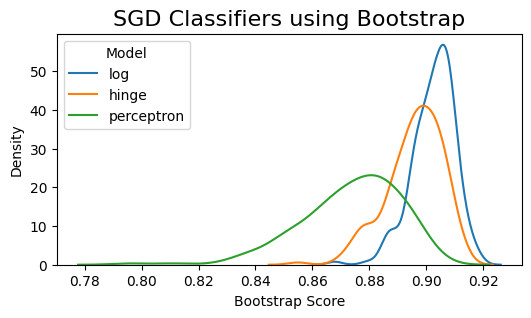

In [ ]:
# Plot SDG classifier using bootstrap
long_format_data = []

for score_dict in scores_list:
    model = score_dict['Model']
    for bs_score in score_dict['BS']:
        long_format_data.append({
            'Model': model,
            'Score': bs_score
        })

long_format_df = pd.DataFrame(long_format_data)

plt.figure(figsize=(6, 3))
for model in long_format_df['Model'].unique():
    subset = long_format_df[long_format_df['Model'] == model]
    sns.kdeplot(data=subset, x='Score', label=model)

plt.title('SGD Classifiers using Bootstrap', size=16)
plt.xlabel('Bootstrap Score')
plt.legend(title='Model')
plt.show()

Finally, you will look at the importance of setting the regularization parameter. Create a database
with only two informative features:

`X, y = make_classification(n_samples=1000,n_features=2000, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)`

Train a regularized classifier using ‘log’ as the loss function. Try both types of regularization ‘l1’
and ‘l2’ and sweep alpha over a range from: [0.0001,0.001,0.01,0.1,1,10,100,1000]. Use fivefold
cross-validation to measure accuracy. Create a table of accuracy indexed by alpha, and use this
table to plot the accuracy for both types of regularization. Your plot should look like this:

In [ ]:
# Classificatino data with two informative features
X, y = make_classification(n_samples=1000,
                           n_features=2000,
                           n_redundant=0,
                           n_informative=2,
                           random_state=1,
                           n_clusters_per_class=1)

In [ ]:
# Train regularized classifier using Logistic Regression
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []
for alpha in alphas:
    l1clf = SGDClassifier(loss='log', penalty='l1', alpha=alpha, random_state=1)
    l2clf = SGDClassifier(loss='log', penalty='l2', alpha=alpha, random_state=1)

    l1_scores = cross_val_score(l1clf, X, y, cv=5, scoring='accuracy')
    l2_scores = cross_val_score(l2clf, X, y, cv=5, scoring='accuracy')

    results.append({'alpha': alpha, 'log L1': l1_scores.mean(),
                    'log L2': l2_scores.mean()})

**Accuracy Table by alpha value**

In [ ]:
# Table results
reg_df = pd.DataFrame(results)
reg_df

,alpha,log L1,log L2
0,0.0001,0.659,0.669
1,0.0010,0.668,0.665
2,0.0100,0.702,0.638
3,0.1000,0.895,0.641
4,1.0000,0.503,0.644
5,10.0000,0.503,0.514
6,100.0000,0.503,0.503
7,1000.0000,0.503,0.503


**L1/L2 Regularization Accuracy Plot**

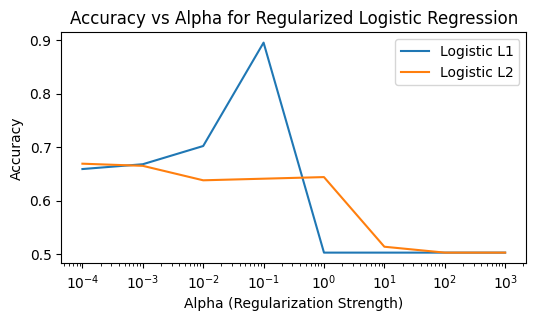

In [ ]:
# Use sns.lineplot for reg_df['alpha'] vs reg_df['log L2'] and reg_df['log L1']
plt.figure(figsize=(6, 3))

sns.lineplot(x='alpha', y='log L1', data=reg_df, label='Logistic L1')
sns.lineplot(x='alpha', y='log L2', data=reg_df, label='Logistic L2')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for Regularized Logistic Regression')
plt.legend()
plt.show()

## Movie Data

**3 Large Scale Linear Classification**
Next, you will use data from a dataset of movie reviews. Unzip the data in aclImdb_v1.tar.

There are several formats of data here, but one simple way to load the data into python is to load
the files individually into a python list, and then use tfidfVectorizer to convert the reviews into bag
of words feature files. Make sure to use pd.DataFrame.sparse.from_spmatrix to make a dataframe
from the word features.
Now, you will use fivefold cross-validation to look at the effect of the regularization penalty on
accuracy. You should be able to simply adapt your code from the earlier section with simulated
data to work on this real data. Note that due to the larger size of this text data, this section will
take several minutes or more to run.

for alpha in [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]: for penalty in [‘l1’,‘l2’]

**3.1 Download Dataset**

https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Since you run the assignment on Google Colab, you don't need to bother extracting all the text
files from the tarball. The following cells just reads all the filenames in a dataframe and you will have
7
code iterating the training and test files, reading the text into a list and appending labels into a
dataframe and the dataframes are constructed.

In [ ]:
import urllib.request

# Download tar.gz file
urllib.request.urlretrieve('https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz', 'aclImdb_v1.tar.gz')

('aclImdb_v1.tar.gz', <http.client.HTTPMessage at 0x7d34b4f8fee0>)

In [ ]:
tar = tarfile.open("aclImdb_v1.tar.gz", "r:gz")
file_df = pd.DataFrame([m.name for m in tar.getmembers()], columns=['filename'])

# Paths
train_neg = 'aclImdb/train/neg/'
train_pos = 'aclImdb/train/pos/'
test_neg = 'aclImdb/test/neg/'
test_pos = 'aclImdb/test/pos/'

**Training Dataset**

In [ ]:
# Create train data set
files = file_df[file_df['filename'].str.startswith(train_neg)]['filename'].tolist()
neglist = []

for file in files:
  f = tar.extractfile(file)
  if f is not None:
    neglist.append(f.read().decode("utf-8"))

files = file_df[file_df['filename'].str.startswith(train_pos)]['filename'].tolist()
poslist = []

for file in files:
  f = tar.extractfile(file)
  if f is not None:
    poslist.append(f.read().decode("utf-8"))

train_neg_df = pd.DataFrame(list(zip(neglist, np.zeros(len(neglist)))),
                            columns=['text', 'labels'])
train_pos_df = pd.DataFrame(list(zip(poslist, np.ones(len(poslist)))),
                            columns=['text', 'labels'])
training = pd.concat([train_neg_df, train_pos_df], ignore_index=True)

In [ ]:
training.head()

,text,labels
0,I rented I AM CURIOUS-YELLOW from my video sto...,0.0
1,"""I Am Curious: Yellow"" is a risible and preten...",0.0
2,If only to avoid making this type of film in t...,0.0
3,This film was probably inspired by Godard's Ma...,0.0
4,"Oh, brother...after hearing about this ridicul...",0.0


**Test Dataset**

In [ ]:
# Create test data set
files = file_df[file_df['filename'].str.startswith(test_neg)]['filename'].tolist()
neglist = []

for file in files:
  f = tar.extractfile(file)
  if f is not None:
    neglist.append(f.read().decode("utf-8"))

files = file_df[file_df['filename'].str.startswith(test_pos)]['filename'].tolist()
poslist = []

for file in files:
  f = tar.extractfile(file)
  if f is not None:
    poslist.append(f.read().decode("utf-8"))

test_neg_df = pd.DataFrame(list(zip(neglist, np.zeros(len(neglist)))),
                           columns=['text', 'labels'])
test_pos_df = pd.DataFrame(list(zip(poslist, np.ones(len(poslist)))),
                           columns=['text', 'labels'])
testing = pd.concat([test_neg_df, test_pos_df], ignore_index=True)

In [ ]:
testing.head()

,text,labels
0,I love sci-fi and am willing to put up with a ...,0.0
1,"Worth the entertainment value of a rental, esp...",0.0
2,its a totally average film with a few semi-alr...,0.0
3,STAR RATING: ***** Saturday Night **** Friday ...,0.0
4,"First off let me say, If you haven't enjoyed a...",0.0


**3.2 Vectorizer - bag of words**

In [ ]:
vectorizer = TfidfVectorizer()
spmat = vectorizer.fit_transform(training['text'])
feat_names = vectorizer.get_feature_names_out()

Xtrain = pd.DataFrame.sparse.from_spmatrix(spmat, columns=feat_names)
ytrain = training['labels']

**SGD Classifier - Log Loss L1 Regularization**

In [ ]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

for alpha in alphas:
    l1clf = SGDClassifier(loss='log', penalty='l1', alpha=alpha, random_state=1)
    l1clf.fit(Xtrain, ytrain)
    print('Finished training, alpha=%f' % alpha)

    l1cv = cross_val_score(l1clf, Xtrain, ytrain, cv=5,
                           scoring='accuracy', n_jobs=-1)
    print('Finished 5-fold CV, alpha=%f' % alpha)

    results.append({'alpha': alpha, 'log L1': l1cv.mean()})

l1_acc = pd.DataFrame(results)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


**SGD Classifier - Log Loss L2 Regularization**

In [ ]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
results = []

for alpha in alphas:
    l2clf = SGDClassifier(loss='log', penalty='l2', alpha=alpha, random_state=1)
    l2clf.fit(Xtrain, ytrain)
    print('Finished training, alpha=%f' % alpha)

    l2cv = cross_val_score(l2clf, Xtrain, ytrain, cv=5,
                           scoring='accuracy', n_jobs=-1)
    print('Finished 5-fold CV, alpha=%f' % alpha)

    results.append({'alpha': alpha, 'log L2': l2cv.mean()})

l2_acc = pd.DataFrame(results)

Finished training, alpha=0.000010
Finished 5-fold CV, alpha=0.000010
Finished training, alpha=0.000100
Finished 5-fold CV, alpha=0.000100
Finished training, alpha=0.001000
Finished 5-fold CV, alpha=0.001000
Finished training, alpha=0.010000
Finished 5-fold CV, alpha=0.010000
Finished training, alpha=0.100000
Finished 5-fold CV, alpha=0.100000
Finished training, alpha=1.000000
Finished 5-fold CV, alpha=1.000000
Finished training, alpha=10.000000
Finished 5-fold CV, alpha=10.000000
Finished training, alpha=100.000000
Finished 5-fold CV, alpha=100.000000
Finished training, alpha=1000.000000
Finished 5-fold CV, alpha=1000.000000


In [ ]:
l1_acc

,alpha,log L1
0,0.00001,0.85820
1,0.00010,0.85400
2,0.00100,0.73228
3,0.01000,0.50000
4,0.10000,0.50000
5,1.00000,0.50000
6,10.00000,0.50000
7,100.00000,0.50000
8,1000.00000,0.50000


In [ ]:
l2_acc

,alpha,log L2
0,0.00001,0.86060
1,0.00010,0.86064
2,0.00100,0.82108
3,0.01000,0.77972
4,0.10000,0.67332
5,1.00000,0.56320
6,10.00000,0.50000
7,100.00000,0.50000
8,1000.00000,0.50000


**L1/L2 Accuracy Plot**

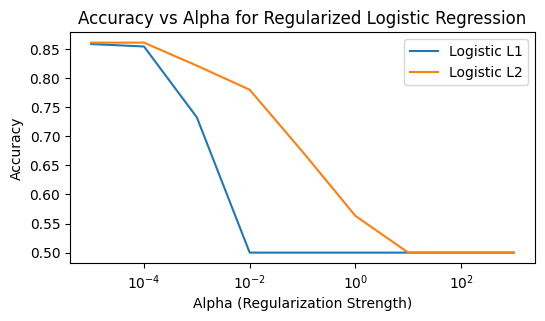

In [ ]:
# Use sns.lineplot for reg_df['alpha'] vs reg_df['log L2'] and reg_df['log L1']
plt.figure(figsize=(6, 3))

sns.lineplot(x='alpha', y='log L1', data=l1_acc, label='Logistic L1')
sns.lineplot(x='alpha', y='log L2', data=l2_acc, label='Logistic L2')

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Alpha for Regularized Logistic Regression')
plt.legend()
plt.show()